# 207 Final Project - Lebron James

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras
from keras import metrics
tf.get_logger().setLevel('INFO')
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Data Cleaning & EDA

### EDA Findings/Changes:

- dataset link: https://www.kaggle.com/code/jonathanbouchet/lebron-james-data/input?select=lebron_career.csv
- 1132 Records
- Ends on March 21, 2018, which is year 15 - lebron is currently playing in year 20
- Seperated the 'result' column into two seperate columns: win/loss and spread
- Each season ends with a different amount of games, this is due to amount of games Lebron played
- Doubled check math for field goal percentages - they are all correct
- Parsed age column to decimal format
- Added year_num column to group games by season
- Converted minutes per game into decimal value
- Changed all column types to fit the ML model




In [2]:
## Read in CSV

#lbj_df = pd.read_csv("lebron_career.csv")

lbj_df = pd.read_csv("lebron_full_career.csv")

In [3]:
## Look at head

lbj_df.head()

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
0,1,10/29/2003,18-303,CLE,SAC,L (-14),42:50:00,12,20,0.600,...,2,4,6,9,4,0,2,25,24.7,-9.0
1,2,10/30/2003,18-304,CLE,PHO,L (-9),40:21:00,8,17,0.471,...,2,10,12,8,1,0,7,21,14.7,-3.0
2,3,11/1/2003,18-306,CLE,POR,L (-19),39:10:00,3,12,0.250,...,0,4,4,6,2,0,2,8,5.0,-21.0
3,4,11/5/2003,18-310,CLE,DEN,L (-4),41:06:00,3,11,0.273,...,2,9,11,7,2,3,2,7,11.2,-3.0
4,5,11/7/2003,18-312,CLE,IND,L (-1),43:44:00,8,18,0.444,...,0,5,5,3,0,0,7,23,9.0,-7.0


In [4]:
## Look at tail

lbj_df.tail()

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
1416,51,4/2/2023,38-093,LAL,HOU,W (+25),29:21:00,8,18,0.444,...,2,8,10,11,0,1,1,18,19.4,23.0
1417,52,4/4/2023,38-095,LAL,UTA,W (+2),38:28:00,14,27,0.519,...,0,5,5,6,1,1,5,37,25.3,-7.0
1418,53,4/5/2023,38-096,LAL,LAC,L (-7),35:06:00,13,20,0.650,...,0,8,8,7,1,1,6,33,26.4,-10.0
1419,54,4/7/2023,38-098,LAL,PHO,W (+14),29:21:00,6,19,0.316,...,0,6,6,6,0,0,5,16,5.3,11.0
1420,55,4/9/2023,38-100,LAL,UTA,W (+11),33:13:00,13,25,0.520,...,1,5,6,6,1,1,2,36,29.8,20.0


In [5]:
## Summary stats

lbj_df.describe()

,game,fg,fga,fgp,three,threeatt,threep,ft,fta,ftp,orb,drb,trb,ast,stl,blk,tov,pts,game_score,minus_plus
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1381.000000,1421.000000,1421.000000,1407.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1420.000000
mean,36.796622,9.959184,19.735398,0.505616,1.591133,4.618578,0.312681,5.691063,7.741027,0.728970,1.172414,6.334272,7.506685,7.332864,1.538353,0.755102,3.494722,27.200563,22.242646,5.086620
std,21.664897,3.099936,4.780131,0.110395,1.501044,2.572508,0.240515,3.368388,4.118038,0.192436,1.170277,2.719287,3.016059,2.962150,1.281823,0.898659,1.819536,7.839582,7.742163,12.676835
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-0.100000,-39.000000
25%,18.000000,8.000000,16.000000,0.435000,0.000000,3.000000,0.125000,3.000000,5.000000,0.615000,0.000000,4.000000,5.000000,5.000000,1.000000,0.000000,2.000000,22.000000,17.000000,-3.000000
50%,36.000000,10.000000,20.000000,0.500000,1.000000,4.000000,0.333000,5.000000,7.000000,0.750000,1.000000,6.000000,7.000000,7.000000,1.000000,1.000000,3.000000,27.000000,22.500000,6.000000
75%,54.000000,12.000000,23.000000,0.579000,2.000000,6.000000,0.500000,8.000000,10.000000,0.857000,2.000000,8.000000,9.000000,9.000000,2.000000,1.000000,5.000000,32.000000,27.300000,14.000000
max,82.000000,23.000000,36.000000,0.929000,9.000000,14.000000,1.000000,24.000000,28.000000,1.000000,7.000000,17.000000,19.000000,19.000000,7.000000,5.000000,11.000000,61.000000,53.200000,39.000000


In [6]:
##Dtypes

lbj_df.dtypes

game            int64
date           object
age            object
team           object
opp            object
result         object
mp             object
fg              int64
fga             int64
fgp           float64
three           int64
threeatt        int64
threep        float64
ft              int64
fta             int64
ftp           float64
orb             int64
drb             int64
trb             int64
ast             int64
stl             int64
blk             int64
tov             int64
pts             int64
game_score    float64
minus_plus    float64
dtype: object

In [7]:
## Check NA

lbj_df.isna().count()

game          1421
date          1421
age           1421
team          1421
opp           1421
result        1421
mp            1421
fg            1421
fga           1421
fgp           1421
three         1421
threeatt      1421
threep        1421
ft            1421
fta           1421
ftp           1421
orb           1421
drb           1421
trb           1421
ast           1421
stl           1421
blk           1421
tov           1421
pts           1421
game_score    1421
minus_plus    1421
dtype: int64

In [8]:
## Parse the result column

lbj_df['win_or_loss'] = lbj_df['result'].str[0]
lbj_df['spread'] = lbj_df['result'].str[3:-1]

In [9]:
## Check if it worked

lbj_df

,game,date,age,team,opp,result,mp,fg,fga,fgp,...,trb,ast,stl,blk,tov,pts,game_score,minus_plus,win_or_loss,spread
0,1,10/29/2003,18-303,CLE,SAC,L (-14),42:50:00,12,20,0.600,...,6,9,4,0,2,25,24.7,-9.0,L,-14
1,2,10/30/2003,18-304,CLE,PHO,L (-9),40:21:00,8,17,0.471,...,12,8,1,0,7,21,14.7,-3.0,L,-9
2,3,11/1/2003,18-306,CLE,POR,L (-19),39:10:00,3,12,0.250,...,4,6,2,0,2,8,5.0,-21.0,L,-19
3,4,11/5/2003,18-310,CLE,DEN,L (-4),41:06:00,3,11,0.273,...,11,7,2,3,2,7,11.2,-3.0,L,-4
4,5,11/7/2003,18-312,CLE,IND,L (-1),43:44:00,8,18,0.444,...,5,3,0,0,7,23,9.0,-7.0,L,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,51,4/2/2023,38-093,LAL,HOU,W (+25),29:21:00,8,18,0.444,...,10,11,0,1,1,18,19.4,23.0,W,+25
1417,52,4/4/2023,38-095,LAL,UTA,W (+2),38:28:00,14,27,0.519,...,5,6,1,1,5,37,25.3,-7.0,W,+2
1418,53,4/5/2023,38-096,LAL,LAC,L (-7),35:06:00,13,20,0.650,...,8,7,1,1,6,33,26.4,-10.0,L,-7
1419,54,4/7/2023,38-098,LAL,PHO,W (+14),29:21:00,6,19,0.316,...,6,6,0,0,5,16,5.3,11.0,W,+14


In [10]:
## Drop the result column

lbj_df.drop('result', axis=1, inplace=True)

In [11]:
## Check it dropped

lbj_df

,game,date,age,team,opp,mp,fg,fga,fgp,three,...,trb,ast,stl,blk,tov,pts,game_score,minus_plus,win_or_loss,spread
0,1,10/29/2003,18-303,CLE,SAC,42:50:00,12,20,0.600,0,...,6,9,4,0,2,25,24.7,-9.0,L,-14
1,2,10/30/2003,18-304,CLE,PHO,40:21:00,8,17,0.471,1,...,12,8,1,0,7,21,14.7,-3.0,L,-9
2,3,11/1/2003,18-306,CLE,POR,39:10:00,3,12,0.250,0,...,4,6,2,0,2,8,5.0,-21.0,L,-19
3,4,11/5/2003,18-310,CLE,DEN,41:06:00,3,11,0.273,0,...,11,7,2,3,2,7,11.2,-3.0,L,-4
4,5,11/7/2003,18-312,CLE,IND,43:44:00,8,18,0.444,1,...,5,3,0,0,7,23,9.0,-7.0,L,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,51,4/2/2023,38-093,LAL,HOU,29:21:00,8,18,0.444,1,...,10,11,0,1,1,18,19.4,23.0,W,+25
1417,52,4/4/2023,38-095,LAL,UTA,38:28:00,14,27,0.519,3,...,5,6,1,1,5,37,25.3,-7.0,W,+2
1418,53,4/5/2023,38-096,LAL,LAC,35:06:00,13,20,0.650,4,...,8,7,1,1,6,33,26.4,-10.0,L,-7
1419,54,4/7/2023,38-098,LAL,PHO,29:21:00,6,19,0.316,3,...,6,6,0,0,5,16,5.3,11.0,W,+14


In [12]:
## Check unique values for W and L, matches the total records in table

lbj_df['win_or_loss'].value_counts()

W    924
L    497
Name: win_or_loss, dtype: int64

In [13]:
## Double check the fgp is correct based on the fg and fga

lbj_df['Calculated Field Goal Percentage'] = (lbj_df['fg'] / lbj_df['fga']).round(3)

In [14]:
## See if it added the column

lbj_df

,game,date,age,team,opp,mp,fg,fga,fgp,three,...,ast,stl,blk,tov,pts,game_score,minus_plus,win_or_loss,spread,Calculated Field Goal Percentage
0,1,10/29/2003,18-303,CLE,SAC,42:50:00,12,20,0.600,0,...,9,4,0,2,25,24.7,-9.0,L,-14,0.600
1,2,10/30/2003,18-304,CLE,PHO,40:21:00,8,17,0.471,1,...,8,1,0,7,21,14.7,-3.0,L,-9,0.471
2,3,11/1/2003,18-306,CLE,POR,39:10:00,3,12,0.250,0,...,6,2,0,2,8,5.0,-21.0,L,-19,0.250
3,4,11/5/2003,18-310,CLE,DEN,41:06:00,3,11,0.273,0,...,7,2,3,2,7,11.2,-3.0,L,-4,0.273
4,5,11/7/2003,18-312,CLE,IND,43:44:00,8,18,0.444,1,...,3,0,0,7,23,9.0,-7.0,L,-1,0.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,51,4/2/2023,38-093,LAL,HOU,29:21:00,8,18,0.444,1,...,11,0,1,1,18,19.4,23.0,W,+25,0.444
1417,52,4/4/2023,38-095,LAL,UTA,38:28:00,14,27,0.519,3,...,6,1,1,5,37,25.3,-7.0,W,+2,0.519
1418,53,4/5/2023,38-096,LAL,LAC,35:06:00,13,20,0.650,4,...,7,1,1,6,33,26.4,-10.0,L,-7,0.650
1419,54,4/7/2023,38-098,LAL,PHO,29:21:00,6,19,0.316,3,...,6,0,0,5,16,5.3,11.0,W,+14,0.316


In [15]:
##Check

lbj_df['Calculated Field Goal Percentage'] == lbj_df['fgp']

0       True
1       True
2       True
3       True
4       True
        ... 
1416    True
1417    True
1418    True
1419    True
1420    True
Length: 1421, dtype: bool

In [16]:
## After checking if the math lined up, it does, round is just slightly different.

In [17]:
lbj_df.drop('Calculated Field Goal Percentage', axis=1, inplace=True)

In [18]:
lbj_df.head()

,game,date,age,team,opp,mp,fg,fga,fgp,three,...,trb,ast,stl,blk,tov,pts,game_score,minus_plus,win_or_loss,spread
0,1,10/29/2003,18-303,CLE,SAC,42:50:00,12,20,0.600,0,...,6,9,4,0,2,25,24.7,-9.0,L,-14
1,2,10/30/2003,18-304,CLE,PHO,40:21:00,8,17,0.471,1,...,12,8,1,0,7,21,14.7,-3.0,L,-9
2,3,11/1/2003,18-306,CLE,POR,39:10:00,3,12,0.250,0,...,4,6,2,0,2,8,5.0,-21.0,L,-19
3,4,11/5/2003,18-310,CLE,DEN,41:06:00,3,11,0.273,0,...,11,7,2,3,2,7,11.2,-3.0,L,-4
4,5,11/7/2003,18-312,CLE,IND,43:44:00,8,18,0.444,1,...,5,3,0,0,7,23,9.0,-7.0,L,-1


In [19]:
## Check if the win_or_loss column line up with spread

In [20]:
# check for inconsistencies between the "win_or_loss" and "spread" columns
inconsistent_rows = ((lbj_df['spread'].str.contains('-') & (lbj_df['win_or_loss'] != 'L')) |
                     (lbj_df['spread'].str.contains('\+') & (lbj_df['win_or_loss'] != 'W')))

inconsistent_rows.to_frame()

# display the inconsistent rows
lbj_df[inconsistent_rows]

,game,date,age,team,opp,mp,fg,fga,fgp,three,...,trb,ast,stl,blk,tov,pts,game_score,minus_plus,win_or_loss,spread


In [21]:
## AGE COLUMN

## Parse the age column
age_parts = lbj_df['age'].str.split('-', expand=True)
years = age_parts[0].astype(int)
days = age_parts[1].astype(int)

# calculate the decimal age by dividing the days out of 365 rounded to third decimal
lbj_df['decimal_age'] = (years + (days / 365)).round(3)

In [22]:
lbj_df

,game,date,age,team,opp,mp,fg,fga,fgp,three,...,ast,stl,blk,tov,pts,game_score,minus_plus,win_or_loss,spread,decimal_age
0,1,10/29/2003,18-303,CLE,SAC,42:50:00,12,20,0.600,0,...,9,4,0,2,25,24.7,-9.0,L,-14,18.830
1,2,10/30/2003,18-304,CLE,PHO,40:21:00,8,17,0.471,1,...,8,1,0,7,21,14.7,-3.0,L,-9,18.833
2,3,11/1/2003,18-306,CLE,POR,39:10:00,3,12,0.250,0,...,6,2,0,2,8,5.0,-21.0,L,-19,18.838
3,4,11/5/2003,18-310,CLE,DEN,41:06:00,3,11,0.273,0,...,7,2,3,2,7,11.2,-3.0,L,-4,18.849
4,5,11/7/2003,18-312,CLE,IND,43:44:00,8,18,0.444,1,...,3,0,0,7,23,9.0,-7.0,L,-1,18.855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,51,4/2/2023,38-093,LAL,HOU,29:21:00,8,18,0.444,1,...,11,0,1,1,18,19.4,23.0,W,+25,38.255
1417,52,4/4/2023,38-095,LAL,UTA,38:28:00,14,27,0.519,3,...,6,1,1,5,37,25.3,-7.0,W,+2,38.260
1418,53,4/5/2023,38-096,LAL,LAC,35:06:00,13,20,0.650,4,...,7,1,1,6,33,26.4,-10.0,L,-7,38.263
1419,54,4/7/2023,38-098,LAL,PHO,29:21:00,6,19,0.316,3,...,6,0,0,5,16,5.3,11.0,W,+14,38.268


In [23]:
## Drop age column
lbj_df.drop('age', axis=1, inplace=True)

In [24]:
## Check it dropped
lbj_df

,game,date,team,opp,mp,fg,fga,fgp,three,threeatt,...,ast,stl,blk,tov,pts,game_score,minus_plus,win_or_loss,spread,decimal_age
0,1,10/29/2003,CLE,SAC,42:50:00,12,20,0.600,0,2,...,9,4,0,2,25,24.7,-9.0,L,-14,18.830
1,2,10/30/2003,CLE,PHO,40:21:00,8,17,0.471,1,5,...,8,1,0,7,21,14.7,-3.0,L,-9,18.833
2,3,11/1/2003,CLE,POR,39:10:00,3,12,0.250,0,1,...,6,2,0,2,8,5.0,-21.0,L,-19,18.838
3,4,11/5/2003,CLE,DEN,41:06:00,3,11,0.273,0,2,...,7,2,3,2,7,11.2,-3.0,L,-4,18.849
4,5,11/7/2003,CLE,IND,43:44:00,8,18,0.444,1,2,...,3,0,0,7,23,9.0,-7.0,L,-1,18.855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,51,4/2/2023,LAL,HOU,29:21:00,8,18,0.444,1,7,...,11,0,1,1,18,19.4,23.0,W,+25,38.255
1417,52,4/4/2023,LAL,UTA,38:28:00,14,27,0.519,3,10,...,6,1,1,5,37,25.3,-7.0,W,+2,38.260
1418,53,4/5/2023,LAL,LAC,35:06:00,13,20,0.650,4,6,...,7,1,1,6,33,26.4,-10.0,L,-7,38.263
1419,54,4/7/2023,LAL,PHO,29:21:00,6,19,0.316,3,7,...,6,0,0,5,16,5.3,11.0,W,+14,38.268


In [25]:
# Create list of date ranges to group games by NBA season
year_ranges = [
    (lbj_df['date'] < '2004-08-01'),
    (lbj_df['date'] >= '2004-08-01') & (lbj_df['date'] < '2005-08-01'),
    (lbj_df['date'] >= '2005-08-01') & (lbj_df['date'] < '2006-08-01'),
    (lbj_df['date'] >= '2006-08-01') & (lbj_df['date'] < '2007-08-01'),
    (lbj_df['date'] >= '2007-08-01') & (lbj_df['date'] < '2008-08-01'),
    (lbj_df['date'] >= '2008-08-01') & (lbj_df['date'] < '2009-08-01'),
    (lbj_df['date'] >= '2009-08-01') & (lbj_df['date'] < '2010-08-01'),
    (lbj_df['date'] >= '2010-08-01') & (lbj_df['date'] < '2011-08-01'),
    (lbj_df['date'] >= '2011-08-01') & (lbj_df['date'] < '2012-08-01'),
    (lbj_df['date'] >= '2012-08-01') & (lbj_df['date'] < '2013-08-01'),
    (lbj_df['date'] >= '2013-08-01') & (lbj_df['date'] < '2014-08-01'),
    (lbj_df['date'] >= '2014-08-01') & (lbj_df['date'] < '2015-08-01'),
    (lbj_df['date'] >= '2015-08-01') & (lbj_df['date'] < '2016-08-01'),
    (lbj_df['date'] >= '2016-08-01') & (lbj_df['date'] < '2017-08-01'),
    (lbj_df['date'] >= '2017-08-01') & (lbj_df['date'] < '2018-08-01'),
    (lbj_df['date'] >= '2018-08-01') & (lbj_df['date'] < '2019-08-01'),
    (lbj_df['date'] >= '2019-08-01') & (lbj_df['date'] < '2020-11-01'),
    (lbj_df['date'] >= '2020-11-01') & (lbj_df['date'] < '2021-08-01'),
    (lbj_df['date'] >= '2021-08-01') & (lbj_df['date'] < '2022-08-01'),
    (lbj_df['date'] >= '2022-08-01')
     ]

# Create array of sequential integers to be assigned based on the date range
year_vals = np.arange(1,21)

In [26]:
# Add year_num column to assign each game to the corresponding NBA season
lbj_df['year_num'] = np.select(year_ranges, year_vals)

In [27]:
# Check 
lbj_df

,game,date,team,opp,mp,fg,fga,fgp,three,threeatt,...,stl,blk,tov,pts,game_score,minus_plus,win_or_loss,spread,decimal_age,year_num
0,1,10/29/2003,CLE,SAC,42:50:00,12,20,0.600,0,2,...,4,0,2,25,24.7,-9.0,L,-14,18.830,1
1,2,10/30/2003,CLE,PHO,40:21:00,8,17,0.471,1,5,...,1,0,7,21,14.7,-3.0,L,-9,18.833,1
2,3,11/1/2003,CLE,POR,39:10:00,3,12,0.250,0,1,...,2,0,2,8,5.0,-21.0,L,-19,18.838,1
3,4,11/5/2003,CLE,DEN,41:06:00,3,11,0.273,0,2,...,2,3,2,7,11.2,-3.0,L,-4,18.849,1
4,5,11/7/2003,CLE,IND,43:44:00,8,18,0.444,1,2,...,0,0,7,23,9.0,-7.0,L,-1,18.855,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,51,4/2/2023,LAL,HOU,29:21:00,8,18,0.444,1,7,...,0,1,1,18,19.4,23.0,W,+25,38.255,20
1417,52,4/4/2023,LAL,UTA,38:28:00,14,27,0.519,3,10,...,1,1,5,37,25.3,-7.0,W,+2,38.260,20
1418,53,4/5/2023,LAL,LAC,35:06:00,13,20,0.650,4,6,...,1,1,6,33,26.4,-10.0,L,-7,38.263,20
1419,54,4/7/2023,LAL,PHO,29:21:00,6,19,0.316,3,7,...,0,0,5,16,5.3,11.0,W,+14,38.268,20


In [28]:
#Check dtypes again

lbj_df.dtypes

game             int64
date            object
team            object
opp             object
mp              object
fg               int64
fga              int64
fgp            float64
three            int64
threeatt         int64
threep         float64
ft               int64
fta              int64
ftp            float64
orb              int64
drb              int64
trb              int64
ast              int64
stl              int64
blk              int64
tov              int64
pts              int64
game_score     float64
minus_plus     float64
win_or_loss     object
spread          object
decimal_age    float64
year_num         int32
dtype: object

In [29]:
#Convert Minutes Played Column to Decimal Format instead of "minutes:seconds"

def convert_to_decimal(time_str):
    if isinstance(time_str, str) and ':00' in time_str:
        minutes, seconds, milliseconds = time_str.split(':')
        return round(int(minutes) + int(seconds) / 60, 2)
    elif isinstance(time_str, str) and ':' in time_str:
        minutes, seconds = time_str.split(':')
        return round(int(minutes) + int(seconds) / 60, 2)
    else:
        return np.nan

lbj_df['mp'] = lbj_df['mp'].apply(convert_to_decimal)


In [30]:
lbj_df

,game,date,team,opp,mp,fg,fga,fgp,three,threeatt,...,stl,blk,tov,pts,game_score,minus_plus,win_or_loss,spread,decimal_age,year_num
0,1,10/29/2003,CLE,SAC,42.83,12,20,0.600,0,2,...,4,0,2,25,24.7,-9.0,L,-14,18.830,1
1,2,10/30/2003,CLE,PHO,40.35,8,17,0.471,1,5,...,1,0,7,21,14.7,-3.0,L,-9,18.833,1
2,3,11/1/2003,CLE,POR,39.17,3,12,0.250,0,1,...,2,0,2,8,5.0,-21.0,L,-19,18.838,1
3,4,11/5/2003,CLE,DEN,41.10,3,11,0.273,0,2,...,2,3,2,7,11.2,-3.0,L,-4,18.849,1
4,5,11/7/2003,CLE,IND,43.73,8,18,0.444,1,2,...,0,0,7,23,9.0,-7.0,L,-1,18.855,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,51,4/2/2023,LAL,HOU,29.35,8,18,0.444,1,7,...,0,1,1,18,19.4,23.0,W,+25,38.255,20
1417,52,4/4/2023,LAL,UTA,38.47,14,27,0.519,3,10,...,1,1,5,37,25.3,-7.0,W,+2,38.260,20
1418,53,4/5/2023,LAL,LAC,35.10,13,20,0.650,4,6,...,1,1,6,33,26.4,-10.0,L,-7,38.263,20
1419,54,4/7/2023,LAL,PHO,29.35,6,19,0.316,3,7,...,0,0,5,16,5.3,11.0,W,+14,38.268,20


In [31]:
#Convert all the datatypes to appropriate types for the ML model to run. 

lbj_df['spread'] = lbj_df['spread'].astype('int64')
lbj_df['year_num'] = lbj_df['year_num'].astype('int64')
lbj_df['decimal_age'] = lbj_df['decimal_age'].astype('int64')
lbj_df['mp'] = lbj_df['mp'].astype('int64')
lbj_df['fgp'] = lbj_df['fgp'].astype('int64')
lbj_df['game_score'] = lbj_df['game_score'].astype('int64')



In [32]:
## Apply One-Hot Encodings to Categorical Variables
## This adds a ton of variables

lbj_df = pd.get_dummies(lbj_df, columns=['team', 'opp'])


In [33]:
#Convert more, this time the date column
lbj_df['date'] = pd.to_datetime(lbj_df['date'])


lbj_df['year'] = lbj_df['date'].dt.year
lbj_df['month'] = lbj_df['date'].dt.month
lbj_df['day'] = lbj_df['date'].dt.day

lbj_df = lbj_df.drop(columns=['date'])

In [34]:
# Calculate the count of NaN values in each column
nan_count = lbj_df.isna().sum()

# Filter and display only the columns that have NaN values
nan_count_filtered = nan_count[nan_count > 0]
print(nan_count_filtered)

threep        40
ftp           14
minus_plus     1
dtype: int64


In [35]:
# Replace NaN values in 'threep' column with 0
lbj_df['threep'] = lbj_df['threep'].fillna(0)

# Replace NaN values in 'ftp' column with 0
lbj_df['ftp'] = lbj_df['ftp'].fillna(0)

In [36]:
## Look at the set

lbj_df

,game,mp,fg,fga,fgp,three,threeatt,threep,ft,fta,...,opp_POR,opp_SAC,opp_SAS,opp_SEA,opp_TOR,opp_UTA,opp_WAS,year,month,day
0,1,42,12,20,0,0,2,0.000,1,3,...,0,1,0,0,0,0,0,2003,10,29
1,2,40,8,17,0,1,5,0.200,4,7,...,0,0,0,0,0,0,0,2003,10,30
2,3,39,3,12,0,0,1,0.000,2,2,...,1,0,0,0,0,0,0,2003,11,1
3,4,41,3,11,0,0,2,0.000,1,1,...,0,0,0,0,0,0,0,2003,11,5
4,5,43,8,18,0,1,2,0.500,6,7,...,0,0,0,0,0,0,0,2003,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,51,29,8,18,0,1,7,0.143,1,1,...,0,0,0,0,0,0,0,2023,4,2
1417,52,38,14,27,0,3,10,0.300,6,6,...,0,0,0,0,0,1,0,2023,4,4
1418,53,35,13,20,0,4,6,0.667,3,5,...,0,0,0,0,0,0,0,2023,4,5
1419,54,29,6,19,0,3,7,0.429,1,2,...,0,0,0,0,0,0,0,2023,4,7


In [37]:
# Check the dtypes one more time
lbj_df.dtypes

game       int64
mp         int64
fg         int64
fga        int64
fgp        int64
           ...  
opp_UTA    uint8
opp_WAS    uint8
year       int64
month      int64
day        int64
Length: 66, dtype: object

In [38]:
# Drop Game_score, and spread (these are indiciators of win or loss, we don't want that in our input model)

lbj_df = lbj_df.drop(columns=['game_score', 'spread'])

In [39]:
lbj_df.columns.to_list()

['game',
 'mp',
 'fg',
 'fga',
 'fgp',
 'three',
 'threeatt',
 'threep',
 'ft',
 'fta',
 'ftp',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'pts',
 'minus_plus',
 'win_or_loss',
 'decimal_age',
 'year_num',
 'team_CLE',
 'team_LAL',
 'team_MIA',
 'opp_ATL',
 'opp_BOS',
 'opp_BRK',
 'opp_CHA',
 'opp_CHI',
 'opp_CHO',
 'opp_CLE',
 'opp_DAL',
 'opp_DEN',
 'opp_DET',
 'opp_GSW',
 'opp_HOU',
 'opp_IND',
 'opp_LAC',
 'opp_LAL',
 'opp_MEM',
 'opp_MIA',
 'opp_MIL',
 'opp_MIN',
 'opp_NJN',
 'opp_NOH',
 'opp_NOK',
 'opp_NOP',
 'opp_NYK',
 'opp_OKC',
 'opp_ORL',
 'opp_PHI',
 'opp_PHO',
 'opp_POR',
 'opp_SAC',
 'opp_SAS',
 'opp_SEA',
 'opp_TOR',
 'opp_UTA',
 'opp_WAS',
 'year',
 'month',
 'day']

# Training, Validation, and Test Split

- Decided to go with chronological split of training, validation, and test split given we are working with time series data
- In our case we used 70/15/15 (train, val, test)
- Made sure there was no overlap as seen below
- Broke each set (train, val and test) into X & Y - X was all input variables, and Y was outcome (in our case, Win or Loss)

In [40]:
### Calculate the total length

n_total = len(lbj_df)
n_train = int(n_total * 0.70)
n_val = int(n_total * 0.15)
n_test = int(n_total * 0.15)

In [41]:
## Double check the lengths
print(f'dataset:', n_total)
print(f'train:',n_train)
print(f'validation:', n_val)
print(f'test:', n_test)

dataset: 1421
train: 994
validation: 213
test: 213


In [42]:
## Create the actual sets themselves
train_df = lbj_df.iloc[:n_train]
val_df = lbj_df.loc[n_train:n_train + n_val]
test_df = lbj_df.loc[n_train + n_val + 1:]

In [43]:
## Check it worked
train_df

,game,mp,fg,fga,fgp,three,threeatt,threep,ft,fta,...,opp_POR,opp_SAC,opp_SAS,opp_SEA,opp_TOR,opp_UTA,opp_WAS,year,month,day
0,1,42,12,20,0,0,2,0.000,1,3,...,0,1,0,0,0,0,0,2003,10,29
1,2,40,8,17,0,1,5,0.200,4,7,...,0,0,0,0,0,0,0,2003,10,30
2,3,39,3,12,0,0,1,0.000,2,2,...,1,0,0,0,0,0,0,2003,11,1
3,4,41,3,11,0,0,2,0.000,1,1,...,0,0,0,0,0,0,0,2003,11,5
4,5,43,8,18,0,1,2,0.500,6,7,...,0,0,0,0,0,0,0,2003,11,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,3,39,7,16,0,2,6,0.333,7,11,...,0,0,0,0,0,0,0,2016,10,29
990,4,35,6,12,0,1,3,0.333,6,10,...,0,0,0,0,0,0,0,2016,11,1
991,5,36,12,22,0,1,4,0.250,5,5,...,0,0,0,0,0,0,0,2016,11,3
992,6,35,9,23,0,1,5,0.200,6,7,...,0,0,0,0,0,0,0,2016,11,5


In [44]:
## Check it worked
val_df

,game,mp,fg,fga,fgp,three,threeatt,threep,ft,fta,...,opp_POR,opp_SAC,opp_SAS,opp_SEA,opp_TOR,opp_UTA,opp_WAS,year,month,day
994,8,38,9,18,0,3,4,0.750,6,9,...,0,0,0,0,0,0,1,2016,11,11
995,9,38,8,21,0,2,5,0.400,1,2,...,0,0,0,0,0,0,0,2016,11,13
996,10,38,10,15,0,2,5,0.400,6,10,...,0,0,0,0,1,0,0,2016,11,15
997,11,28,9,14,0,1,3,0.333,2,3,...,0,0,0,0,0,0,0,2016,11,18
998,12,37,11,21,0,2,3,0.667,7,8,...,1,0,0,0,0,0,0,2016,11,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,6,37,8,23,0,0,6,0.000,5,10,...,0,0,1,0,0,0,0,2019,11,3
1204,7,35,10,19,0,2,6,0.333,8,9,...,0,0,0,0,0,0,0,2019,11,5
1205,8,36,10,19,0,4,7,0.571,1,2,...,0,0,0,0,0,0,0,2019,11,8
1206,9,35,5,15,0,0,2,0.000,3,6,...,0,0,0,0,1,0,0,2019,11,10


In [45]:
## Check it worked
test_df

,game,mp,fg,fga,fgp,three,threeatt,threep,ft,fta,...,opp_POR,opp_SAC,opp_SAS,opp_SEA,opp_TOR,opp_UTA,opp_WAS,year,month,day
1208,11,26,11,21,0,1,5,0.200,0,1,...,0,0,0,0,0,0,0,2019,11,13
1209,12,38,10,20,0,2,7,0.286,7,7,...,0,1,0,0,0,0,0,2019,11,15
1210,13,33,13,21,0,6,10,0.600,1,1,...,0,0,0,0,0,0,0,2019,11,17
1211,14,37,10,21,0,2,5,0.400,3,5,...,0,0,0,0,0,0,0,2019,11,19
1212,15,35,9,20,0,1,3,0.333,4,6,...,0,0,0,0,0,0,0,2019,11,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,51,29,8,18,0,1,7,0.143,1,1,...,0,0,0,0,0,0,0,2023,4,2
1417,52,38,14,27,0,3,10,0.300,6,6,...,0,0,0,0,0,1,0,2023,4,4
1418,53,35,13,20,0,4,6,0.667,3,5,...,0,0,0,0,0,0,0,2023,4,5
1419,54,29,6,19,0,3,7,0.429,1,2,...,0,0,0,0,0,0,0,2023,4,7


### Make X and Y for each respective set (train, val, and test)

In [46]:
### Create X and Y's for each respective set (train)

x_train = train_df.drop('win_or_loss', axis=1)
y_train = train_df[['win_or_loss']]

In [47]:
## Check lengths match, and check proper columns were dropped
print(len(x_train))
print(len(y_train))

994
994


In [48]:
### Create X and Y's for each respective set (validation)

x_val = val_df.drop('win_or_loss', axis=1)
y_val = val_df[['win_or_loss']]

In [49]:
## Check lengths match, and check proper columns were dropped

print(len(x_val))
print(len(y_val))

214
214


In [50]:
### Create X and Y's for each respective set (test)

x_test = test_df.drop('win_or_loss', axis=1)
y_test = test_df[['win_or_loss']]

In [51]:
## Check lengths match, and check proper columns were dropped

print(len(x_test))
print(len(y_test))

213
213


In [52]:
## Check the shapes

print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_val.shape)


(994, 63)
(994, 1)
(214, 63)
(214, 1)
(213, 63)
(214, 1)


In [53]:
x_train.columns.to_list()

['game',
 'mp',
 'fg',
 'fga',
 'fgp',
 'three',
 'threeatt',
 'threep',
 'ft',
 'fta',
 'ftp',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'pts',
 'minus_plus',
 'decimal_age',
 'year_num',
 'team_CLE',
 'team_LAL',
 'team_MIA',
 'opp_ATL',
 'opp_BOS',
 'opp_BRK',
 'opp_CHA',
 'opp_CHI',
 'opp_CHO',
 'opp_CLE',
 'opp_DAL',
 'opp_DEN',
 'opp_DET',
 'opp_GSW',
 'opp_HOU',
 'opp_IND',
 'opp_LAC',
 'opp_LAL',
 'opp_MEM',
 'opp_MIA',
 'opp_MIL',
 'opp_MIN',
 'opp_NJN',
 'opp_NOH',
 'opp_NOK',
 'opp_NOP',
 'opp_NYK',
 'opp_OKC',
 'opp_ORL',
 'opp_PHI',
 'opp_PHO',
 'opp_POR',
 'opp_SAC',
 'opp_SAS',
 'opp_SEA',
 'opp_TOR',
 'opp_UTA',
 'opp_WAS',
 'year',
 'month',
 'day']

In [54]:
y_train.columns.to_list()

['win_or_loss']

In [55]:
#Check Nans

nan_count_test = x_test.isnull().sum()
print(nan_count_test)

game       0
mp         0
fg         0
fga        0
fgp        0
          ..
opp_UTA    0
opp_WAS    0
year       0
month      0
day        0
Length: 63, dtype: int64


In [56]:
#Check NaN count

nan_count_filtered_test = nan_count_test[nan_count_test > 0]
print(nan_count_filtered_test)

minus_plus    1
dtype: int64


In [57]:
#Find the record

nan_rows = x_test[x_test['minus_plus'].isnull()]
print(nan_rows)

      game  mp  fg  fga  fgp  three  threeatt  threep  ft  fta  ...  opp_POR  \
1415    50  32   7   19    0      1         3   0.333   3    4  ...        0   

      opp_SAC  opp_SAS  opp_SEA  opp_TOR  opp_UTA  opp_WAS  year  month  day  
1415        0        0        0        0        0        0  2023      3   31  

[1 rows x 63 columns]


In [58]:
#Fill it with 0

x_test['minus_plus'] = x_test['minus_plus'].fillna(0)

In [59]:
column_list = lbj_df.columns.tolist()
print(column_list)

['game', 'mp', 'fg', 'fga', 'fgp', 'three', 'threeatt', 'threep', 'ft', 'fta', 'ftp', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pts', 'minus_plus', 'win_or_loss', 'decimal_age', 'year_num', 'team_CLE', 'team_LAL', 'team_MIA', 'opp_ATL', 'opp_BOS', 'opp_BRK', 'opp_CHA', 'opp_CHI', 'opp_CHO', 'opp_CLE', 'opp_DAL', 'opp_DEN', 'opp_DET', 'opp_GSW', 'opp_HOU', 'opp_IND', 'opp_LAC', 'opp_LAL', 'opp_MEM', 'opp_MIA', 'opp_MIL', 'opp_MIN', 'opp_NJN', 'opp_NOH', 'opp_NOK', 'opp_NOP', 'opp_NYK', 'opp_OKC', 'opp_ORL', 'opp_PHI', 'opp_PHO', 'opp_POR', 'opp_SAC', 'opp_SAS', 'opp_SEA', 'opp_TOR', 'opp_UTA', 'opp_WAS', 'year', 'month', 'day']


# Logistic Regression

In [60]:
## Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_val_scaled = scaler.transform(x_val)
X_test_scaled = scaler.transform(x_test)

In [61]:
## Run the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, np.ravel(y_train))

LogisticRegression(random_state=42)

In [62]:
y_val_pred = log_reg.predict(X_val_scaled)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation accuracy: {val_accuracy}")

# Print classification report
print(classification_report(y_val, y_val_pred))

# Print confusion matrix
print(confusion_matrix(y_val, y_val_pred))

Validation accuracy: 0.8504672897196262
              precision    recall  f1-score   support

           L       0.84      0.76      0.80        83
           W       0.86      0.91      0.88       131

    accuracy                           0.85       214
   macro avg       0.85      0.83      0.84       214
weighted avg       0.85      0.85      0.85       214

[[ 63  20]
 [ 12 119]]


In [63]:
# Get coefficients from the logistic regression model
log_reg_coefficients = log_reg.coef_[0]

# Create a DataFrame with the feature names and their coefficients
coefficients_df = pd.DataFrame(
    {"feature": x_train.columns, "coefficient": log_reg_coefficients}
)

# Sort the DataFrame by the absolute values of the coefficients in descending order
coefficients_df_sorted = coefficients_df.reindex(
    coefficients_df.coefficient.abs().sort_values(ascending=False).index
)

# Display the sorted DataFrame
print(coefficients_df_sorted)

       feature  coefficient
19  minus_plus     3.921942
6     threeatt    -0.587194
1           mp    -0.452594
29     opp_CHI    -0.424622
58     opp_UTA    -0.407445
..         ...          ...
55     opp_SAS    -0.008524
25     opp_ATL     0.007129
41     opp_MIA    -0.004883
4          fgp     0.000000
23    team_LAL     0.000000

[63 rows x 2 columns]


In [64]:
# Make predictions on the test set
y_test_pred = log_reg.predict(X_test_scaled)

# Calculate the accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test accuracy:", test_accuracy)

# Print the classification report
print(classification_report(y_test, y_test_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_test_pred))

Test accuracy: 0.7887323943661971
              precision    recall  f1-score   support

           L       0.77      0.67      0.72        86
           W       0.80      0.87      0.83       127

    accuracy                           0.79       213
   macro avg       0.79      0.77      0.78       213
weighted avg       0.79      0.79      0.79       213

[[ 58  28]
 [ 17 110]]


# Decision Tree

In [65]:
# Create the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
dtree.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_val_pred_dtree = dtree.predict(X_val_scaled)

# Calculate the accuracy
val_accuracy_dtree = accuracy_score(y_val, y_val_pred_dtree)
print("Validation accuracy (Decision Tree):", val_accuracy_dtree)

# Print the classification report
print(classification_report(y_val, y_val_pred_dtree))

# Print the confusion matrix
print(confusion_matrix(y_val, y_val_pred_dtree))

Validation accuracy (Decision Tree): 0.8317757009345794
              precision    recall  f1-score   support

           L       0.81      0.73      0.77        83
           W       0.84      0.89      0.87       131

    accuracy                           0.83       214
   macro avg       0.83      0.81      0.82       214
weighted avg       0.83      0.83      0.83       214

[[ 61  22]
 [ 14 117]]


In [66]:
# Make predictions on the test set
y_test_pred_dtree = dtree.predict(X_test_scaled)

# Calculate the accuracy
test_accuracy_dtree = accuracy_score(y_test, y_test_pred_dtree)
print("Test accuracy (Decision Tree):", test_accuracy_dtree)

# Print the classification report
print(classification_report(y_test, y_test_pred_dtree))

# Print the confusion matrix
print(confusion_matrix(y_test, y_test_pred_dtree))

Test accuracy (Decision Tree): 0.7746478873239436
              precision    recall  f1-score   support

           L       0.77      0.63      0.69        86
           W       0.78      0.87      0.82       127

    accuracy                           0.77       213
   macro avg       0.77      0.75      0.76       213
weighted avg       0.77      0.77      0.77       213

[[ 54  32]
 [ 16 111]]


In [67]:
# Get feature importances from the Decision Tree model
feature_importances = dtree.feature_importances_

# Create a DataFrame with the feature names and their importance scores
feature_importance_df = pd.DataFrame(
    {"feature": x_train.columns, "importance": feature_importances}
)

# Sort the DataFrame by importance scores in descending order
feature_importance_df_sorted = feature_importance_df.sort_values(
    by="importance", ascending=False
)

# Display the sorted DataFrame
print(feature_importance_df_sorted)

       feature  importance
19  minus_plus    0.674736
13         trb    0.027263
17         tov    0.023570
18         pts    0.020664
8           ft    0.019447
..         ...         ...
30     opp_CHO    0.000000
23    team_LAL    0.000000
28     opp_CHA    0.000000
27     opp_BRK    0.000000
31     opp_CLE    0.000000

[63 rows x 2 columns]


# Random Forest

In [68]:
# Create the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf.fit(X_train_scaled, y_train.values.ravel())

# Make predictions on the validation set
y_val_pred_rf = rf.predict(X_val_scaled)

# Calculate the accuracy
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print("Validation accuracy (Random Forest):", val_accuracy_rf)

# Print the classification report
print(classification_report(y_val, y_val_pred_rf))

# Print the confusion matrix
print(confusion_matrix(y_val, y_val_pred_rf))

Validation accuracy (Random Forest): 0.8598130841121495
              precision    recall  f1-score   support

           L       0.90      0.72      0.80        83
           W       0.84      0.95      0.89       131

    accuracy                           0.86       214
   macro avg       0.87      0.83      0.85       214
weighted avg       0.86      0.86      0.86       214

[[ 60  23]
 [  7 124]]


In [69]:
# Make predictions on the test set
y_test_pred_rf = rf.predict(X_test_scaled)

# Calculate the accuracy
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("Test accuracy (Random Forest):", test_accuracy_rf)

# Print the classification report
print(classification_report(y_test, y_test_pred_rf))

# Print the confusion matrix
print(confusion_matrix(y_test, y_test_pred_rf))


Test accuracy (Random Forest): 0.8309859154929577
              precision    recall  f1-score   support

           L       0.86      0.70      0.77        86
           W       0.82      0.92      0.87       127

    accuracy                           0.83       213
   macro avg       0.84      0.81      0.82       213
weighted avg       0.83      0.83      0.83       213

[[ 60  26]
 [ 10 117]]


In [70]:
# Get the feature importances
importances = rf.feature_importances_

# Get the column names from the input dataset
feature_names = x_train.columns

# Create a dictionary of feature names and their importances
feature_importances = dict(zip(feature_names, importances))

# Sort the dictionary by importance score in descending order
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the sorted feature importances
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

minus_plus: 0.3771727858871872
mp: 0.04056644339852327
ast: 0.0371206198289966
pts: 0.03365913739961496
fga: 0.0315752130364749
year: 0.030720791299457022
game: 0.02980625039170599
decimal_age: 0.02877800423580009
tov: 0.02820905068935047
ftp: 0.02720408272864553
trb: 0.025738850070947547
threeatt: 0.024486729104488115
drb: 0.024369257769071572
fg: 0.023820305926429027
fta: 0.023815622426926995
day: 0.023534367454492222
ft: 0.022771172909089234
threep: 0.019334054122475988
stl: 0.01565530457999154
orb: 0.014373729641304447
blk: 0.013809915940793059
month: 0.013710926546823168
three: 0.010922032926537128
opp_CHI: 0.007317168626622446
year_num: 0.003862081495739923
team_CLE: 0.003834881913384329
opp_UTA: 0.003634776642809276
team_MIA: 0.0033786817875806428
opp_PHI: 0.00309403562289784
opp_ATL: 0.002875410359765038
opp_TOR: 0.0027318341348056114
opp_NYK: 0.0027104885434068933
opp_LAL: 0.00269759855272107
opp_ORL: 0.0026555334050327585
opp_DEN: 0.0025237535015993464
opp_BOS: 0.002519157737

# Neural Network

In [71]:
# For encoding W/L to 1 and 0 for the Neural Network


encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train.values.ravel())
y_val_encoded = encoder.transform(y_val.values.ravel())
y_test_encoded = encoder.transform(y_test.values.ravel())

Epoch 1/50
32/32 - 1s - loss: 0.7703 - accuracy: 0.5191 - val_loss: 0.7118 - val_accuracy: 0.5794 - 525ms/epoch - 16ms/step
Epoch 2/50
32/32 - 0s - loss: 0.6255 - accuracy: 0.6700 - val_loss: 0.6598 - val_accuracy: 0.6402 - 63ms/epoch - 2ms/step
Epoch 3/50
32/32 - 0s - loss: 0.5499 - accuracy: 0.7334 - val_loss: 0.6188 - val_accuracy: 0.6776 - 55ms/epoch - 2ms/step
Epoch 4/50
32/32 - 0s - loss: 0.4854 - accuracy: 0.7666 - val_loss: 0.5971 - val_accuracy: 0.7056 - 54ms/epoch - 2ms/step
Epoch 5/50
32/32 - 0s - loss: 0.4288 - accuracy: 0.8149 - val_loss: 0.5670 - val_accuracy: 0.7243 - 54ms/epoch - 2ms/step
Epoch 6/50
32/32 - 0s - loss: 0.3793 - accuracy: 0.8390 - val_loss: 0.5510 - val_accuracy: 0.7196 - 53ms/epoch - 2ms/step
Epoch 7/50
32/32 - 0s - loss: 0.3343 - accuracy: 0.8702 - val_loss: 0.5168 - val_accuracy: 0.7523 - 56ms/epoch - 2ms/step
Epoch 8/50
32/32 - 0s - loss: 0.2950 - accuracy: 0.8843 - val_loss: 0.5078 - val_accuracy: 0.7617 - 54ms/epoch - 2ms/step
Epoch 9/50
32/32 - 0s 

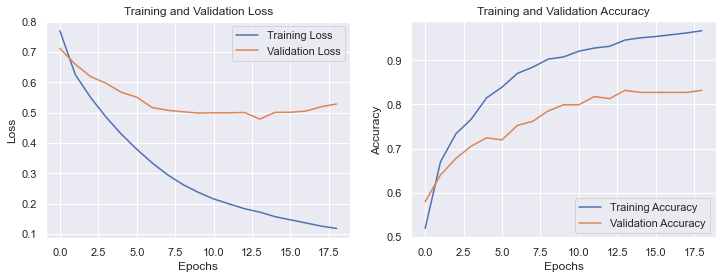

In [77]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the neural network architecture
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')  # 2 output classes (W, L)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model on the training set with early stopping
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_val_scaled, y_val_encoded), verbose=2, callbacks=[early_stopping])

# Get the validation accuracy
val_accuracy = history.history['val_accuracy'][-1]
print("Validation accuracy (Neural Network):", val_accuracy)

plot_history(history)

